# Grid sampling

Pour évaluer certaines interbentions de santé publique, en l'absence de base de sondage, on a souvent recours aux données administratives.Ces dernières sont très souvent de mauvaise qualité et présente souvent de biais. L'utilisation des échantillonnage par maillage (grid sampling) est une alternative pour des évaluations. 
La couverture thérapeutique lors des campagnes de de traitement de masse contre l'onchocercoe et la filariose lymphatique, la couverture vaccinale post campagne JNV contre la poliopoliomyelite, la séroprévalence du covid au sein de la population peuvent être estimées à l'aide du grid sampling

#### Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

#### Importation des données

In [2]:
downtown_gdf = gpd.read_file('data/Zone_habitable.shp')

In [3]:
type(downtown_gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
downtown_gdf

,id,Nom_ville,Population,Ménages,Arrond,geometry
0,1,Ngambe Tikar,None,None,None,"POLYGON ((11.49720 5.80848, 11.49771 5.80816, ..."
1,2,Yoko,None,None,None,"POLYGON ((12.32715 5.51884, 12.32644 5.51794, ..."


In [5]:
ngambe_tikar_gdf = gpd.read_file('data/AS_Centre_Nom_AS__Ngambe-tikar.shp')

In [6]:
yoko_gdf = gpd.read_file('data/AS_Centre_Nom_AS__Yoko.shp')

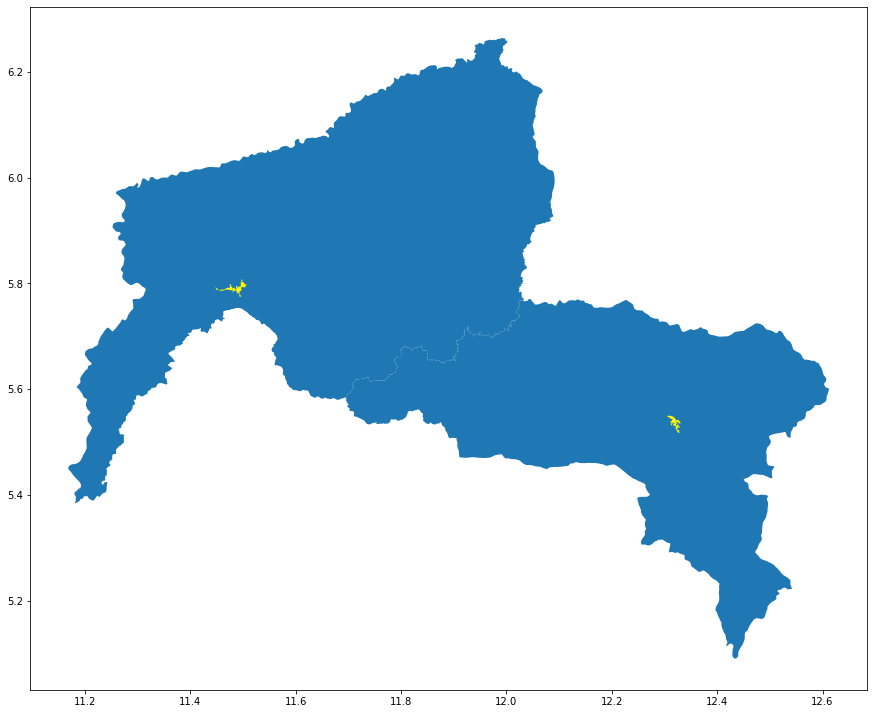

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
ngambe_tikar_gdf.plot(ax=ax)
yoko_gdf.plot(ax=ax)
downtown_gdf.plot(ax=ax, color='yellow')
plt.show()

- En bleu les aires de santé de YOKO et NGAMBE TIKAR
- Le zones en jaunes sont les centre villes ou zone habitables des aires de santé de YOKO (à droite) et NGAMBE TIKAR (à gauche).

Zone habitable de NGAMBE TIKAR

In [8]:
ngambe_downtown_gdf = downtown_gdf[downtown_gdf['Nom_ville'] == 'Ngambe Tikar']

In [9]:
ngambe_downtown_gdf.explore()

Zone habitable de YOKO

In [10]:
yoko_downtown_gdf = downtown_gdf[downtown_gdf['Nom_ville'] == 'Yoko']

In [11]:
yoko_downtown_gdf.explore()

Reprojection des coordonnées

#### Coordonnées projetées

In [12]:
ngambe_downtown_utm_32632_gdf = ngambe_downtown_gdf.to_crs(epsg=32632)

In [13]:
yoko_downtown_utm_32632_gdf = yoko_downtown_gdf.to_crs(epsg=32632)

Utilisation d'n fond de carte satelittaire

In [14]:
# Importation de la librairie folium

In [15]:
import folium

In [16]:
# Récupération du centoide du polygone de la zone habitable pour utilisation comme argument "location" du zoom

In [17]:
ngambe_downtown_centroid = ngambe_downtown_gdf.geometry.centroid

C:\Users\hp\AppData\Local\Temp\ipykernel_8948\3179308757.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ngambe_downtown_centroid = ngambe_downtown_gdf.geometry.centroid


In [18]:
ngambe_downtown_location = [ngambe_downtown_centroid.y, ngambe_downtown_centroid.x]

In [19]:
ngambe_downtown_location[0], ngambe_downtown_location[1]

(0    5.791041
 dtype: float64,
 0    11.486217
 dtype: float64)

In [20]:
yoko_downtown_centroid = yoko_downtown_gdf.geometry.centroid

C:\Users\hp\AppData\Local\Temp\ipykernel_8948\2932969216.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  yoko_downtown_centroid = yoko_downtown_gdf.geometry.centroid


In [21]:
yoko_downtown_location = [yoko_downtown_centroid.y, yoko_downtown_centroid.x]

In [22]:
yoko_downtown_location

[1    5.537212
 dtype: float64,
 1    12.319455
 dtype: float64]

In [23]:
yoko_downtown_map = folium.Map(location=yoko_downtown_location, zoom_start=14.5)

In [24]:
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
).add_to(yoko_downtown_map)
display(yoko_downtown_map)

In [25]:
ngambe_downtown_map = folium.Map(location=ngambe_downtown_location, zoom_start=14.5)

In [26]:
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
).add_to(ngambe_downtown_map)
display(ngambe_downtown_map)

In [27]:
# Création de la grille d'échantillonnage dont les unités (des carrés) seront les unités de sondage

#### Création de grille

In [28]:
# total area for the grid
xmin, ymin, xmax, ymax = yoko_downtown_utm_32632_gdf.total_bounds
# how many cells across and down
n_cells=200
cell_size = (xmax-xmin)/n_cells

In [29]:
print(xmin, ymin, xmax, ymax)

866308.9895128534 610935.0992156017 869080.6091419335 614533.3889579738


In [30]:
import shapely

In [31]:
# create the cells in a loop
#shapely.geometry.box(minx, miny, maxx, maxy, ccw=True)

grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )

In [32]:
type(grid_cells)

list

In [33]:
type(grid_cells[0])

shapely.geometry.polygon.Polygon

In [34]:
cells = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs=yoko_downtown_utm_32632_gdf.crs)

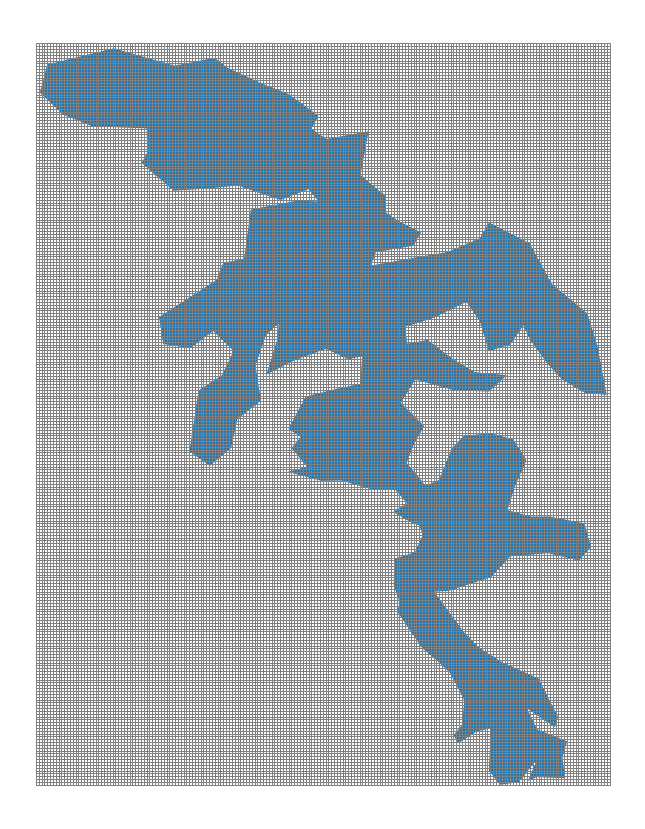

In [35]:
ax = yoko_downtown_utm_32632_gdf.plot(figsize=(15, 15), edgecolor='white')
#plt.autoscale(False)
cells.plot(ax=ax, facecolor="none", edgecolor='grey')
ax.axis("off")
plt.show()

In [36]:
# Récuperer seules les parties de la grille qui font intersetion avec la zone habitable. On obtient une rille d'échantillonnage

In [37]:
res_intersect = cells.overlay(yoko_downtown_utm_32632_gdf, how='intersection')

C:\Users\hp\anaconda3\lib\site-packages\geopandas\geodataframe.py:2352: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


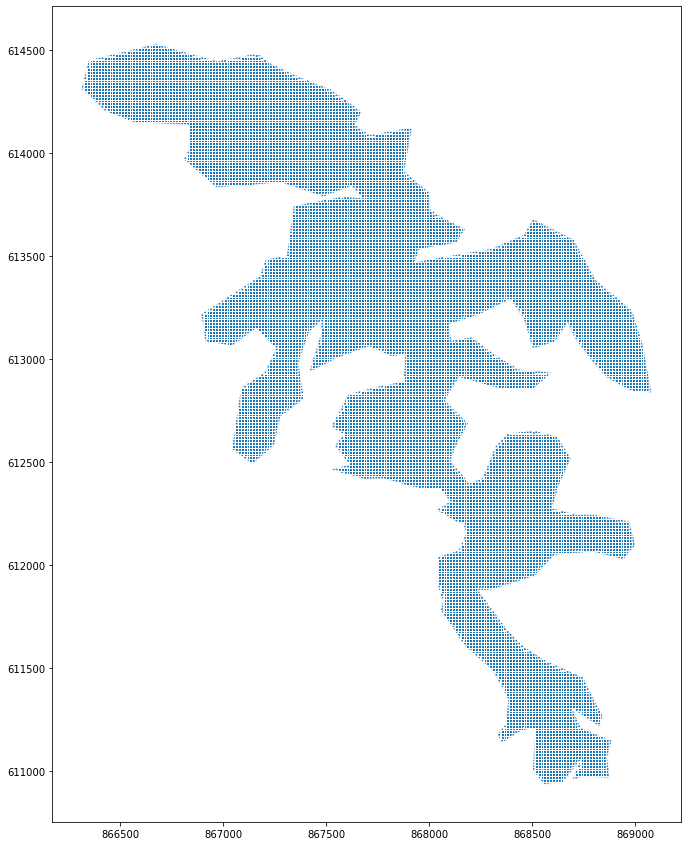

In [38]:
res_intersect.plot(figsize=(15, 15), edgecolor='white')
plt.show()

In [39]:
res_intersect.shape

(16620, 6)

In [40]:
# On dénombre 16620 unité de sondage dans cette grille d'échantillonnage

In [41]:
res_intersect.head()

,id,Nom_ville,Population,Ménages,Arrond,geometry
0,2,Yoko,None,None,None,"POLYGON ((866322.848 614302.617, 866322.848 61..."
1,2,Yoko,None,None,None,"POLYGON ((866322.848 614316.475, 866322.848 61..."
2,2,Yoko,None,None,None,"POLYGON ((866322.848 614330.333, 866322.848 61..."
3,2,Yoko,None,None,None,"POLYGON ((866322.848 614344.191, 866322.848 61..."
4,2,Yoko,None,None,None,"POLYGON ((866322.848 614358.049, 866322.848 61..."


In [42]:
# On procéde _ un échantillonnage aléatoire de 100 unité de sondage

In [43]:
res_intersect_sample = res_intersect.sample(n=100, random_state=2022)

In [44]:
res_intersect_sample.shape

(100, 6)

In [45]:
res_intersect_sample.head()

,id,Nom_ville,Population,Ménages,Arrond,geometry
11847,2,Yoko,None,None,None,"POLYGON ((868332.272 612113.038, 868346.130 61..."
11942,2,Yoko,None,None,None,"POLYGON ((868346.130 611600.288, 868359.988 61..."
13241,2,Yoko,None,None,None,"POLYGON ((868484.711 612473.348, 868498.569 61..."
12598,2,Yoko,None,None,None,"POLYGON ((868415.420 612154.612, 868429.279 61..."
3038,2,Yoko,None,None,None,"POLYGON ((867223.624 612861.375, 867237.482 61..."


In [46]:
res_intersect_sample.shape

(100, 6)

In [47]:
res_intersect_sample.explore()

In [48]:
folium.GeoJson(res_intersect_sample.geometry).add_to(yoko_downtown_map)
display(yoko_downtown_map)

In [49]:
# On récupère les centroides des cellules pour tranferer les points dans un fichier gpx utilisable par les agents enquêteur sur le terrain

In [50]:
res_intersect_sample_84 = res_intersect_sample.to_crs(epsg=4326)

In [51]:
sampling_centroid = res_intersect_sample_84.geometry.centroid

C:\Users\hp\AppData\Local\Temp\ipykernel_8948\1651380915.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sampling_centroid = res_intersect_sample_84.geometry.centroid


In [52]:
type(sampling_centroid)

geopandas.geoseries.GeoSeries

In [53]:
sampling_centroid.to_file('data_output/sampling.gpx', 'GPX')

In [54]:
# folium.GeoJson(yoko_downtown_utm_32632_gdf.geometry).add_to(yoko_downtown_map)
# display(yoko_downtown_map)